In [1]:
import pandas as pd
from PIL import Image, ImageFilter
from numpy import array
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os

In [73]:
# Load in ALL train images and label them
X = []
y = []
for j in range(10):
    print('Load folder c{}'.format(j))
    path = os.path.join('C:/Users/buckf/Documents/MSDS 686/Code/Distracted Driver Project/Data/imgs', 'train', 'c' + str(j), '*.jpg')
    img_list = glob.glob(path)
    for file in img_list:
        img = Image.open(file).convert('L')
        height, width = img.size
        img.thumbnail((height/16, width/16), Image.ANTIALIAS)
        pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 1)
        X.append(pix)
        y.append(j)
    print("Number of train Images: %s" % len(X))
    
X = np.array(X, dtype = 'float32')
y = np.array(y, dtype = 'float32')
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, shuffle = True)

Load folder c0
Number of train Images: 2489
Load folder c1
Number of train Images: 4756
Load folder c2
Number of train Images: 7073
Load folder c3
Number of train Images: 9419
Load folder c4
Number of train Images: 11745
Load folder c5
Number of train Images: 14057
Load folder c6
Number of train Images: 16382
Load folder c7
Number of train Images: 18384
Load folder c8
Number of train Images: 20295
Load folder c9
Number of train Images: 22424


C:\Users\buckf\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
#Standardize the Pixel Data
X_train = X_train / 255
X_val = X_val / 255

In [4]:
X_train.shape

(17939, 40, 30, 1)

In [5]:
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

import keras.utils as np_utils

C:\Users\buckf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#Make targets a categorical array.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [7]:
print(y_train.shape)
print(y_train[2])

(17939, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
print(X_train.shape)
print(X_train[2])

(17939, 40, 30, 1)
[[[0.09803922]
  [0.11372549]
  [0.12156863]
  ...
  [0.63529414]
  [0.40784314]
  [0.3647059 ]]

 [[0.40784314]
  [0.45490196]
  [0.61960787]
  ...
  [0.75686276]
  [0.7647059 ]
  [0.83137256]]

 [[0.8745098 ]
  [0.8862745 ]
  [0.90588236]
  ...
  [0.6901961 ]
  [0.92941177]
  [0.6627451 ]]

 ...

 [[0.04313726]
  [0.03921569]
  [0.03529412]
  ...
  [0.12156863]
  [0.28235295]
  [0.32156864]]

 [[0.29803923]
  [0.35686275]
  [0.38431373]
  ...
  [0.02352941]
  [0.04313726]
  [0.07058824]]

 [[0.08627451]
  [0.10196079]
  [0.11764706]
  ...
  [0.10980392]
  [0.01960784]
  [0.03529412]]]


In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = (40, 30, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(units = num_pixels, activation = 'relu'))
    model.add(Dense(units = num_classes, activation = 'softmax'))

    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])
    return model
    
# build the model
model = simple_cnn_model()

# Fit the model

t0 = time.time()
log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=5, verbose=1)
t1 = time.time()
print(t1-t0, " seconds")
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 17939 samples, validate on 4485 samples
Epoch 1/20
17939/17939 [==============================] - 87s 5ms/step - loss: 0.4200 - acc: 0.8674 - val_loss: 0.1209 - val_acc: 0.9628
Epoch 2/20
17939/17939 [==============================] - 83s 5ms/step - loss: 0.0819 - acc: 0.9764 - val_loss: 0.1349 - val_acc: 0.9596
Epoch 3/20
17939/17939 [==============================] - 82s 5ms/step - loss: 0.0483 - acc: 0.9857 - val_loss: 0.0880 - val_acc: 0.9819
Epoch 4/20
17939/17939 [==============================] - 82s 5ms/step - loss: 0.0396 - acc: 0.9886 - val_loss: 0.0535 - val_acc: 0.9866
Epoch 5/20
17939/17939 [==============================] - 81s 5ms/step - loss: 0.0266 - acc: 0.9928 - val_loss: 0.0955 - val_acc: 0.9746
Epoch 6/20
17939/17939 [==============================] - 82s 5ms/step - loss: 0.0225 - acc: 0.9943 - val_loss: 0.0563 - val_acc: 0.9875
Epoch 7/20
17939/17939 [==============================] - 81s 5ms/step - loss: 0.0263 - acc: 0.9928 - val_loss: 0.0772 - val_acc:

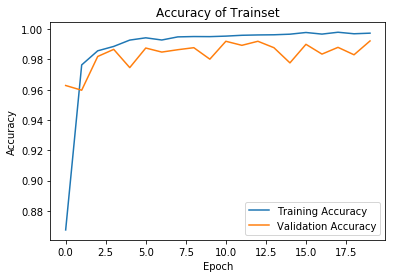

In [11]:
import matplotlib.pyplot as plt

plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

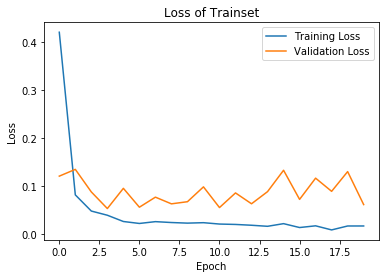

In [12]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Loss of Trainset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [13]:
def inception2(x, n = 32):
    tower_1 = Conv2D(n, 1, padding = 'same', activation = 'relu')(x)
    tower_2 = Conv2D(n, 1, padding = 'same', activation = 'relu')(x)
    tower_3 = Conv2D(n, 1, padding = 'same', activation = 'relu')(x)
    tower_4 = MaxPooling2D(pool_size = (3,3), strides = (1,1), padding = 'same')(x)
    tower_2 = Conv2D(n, 3, padding = 'same', activation = 'relu')(tower_2)
    tower_3 = Conv2D(n, 5, padding = 'same', activation = 'relu')(tower_3)
    tower_4 = Conv2D(n, 1, padding = 'same', activation = 'relu')(tower_4)
    c = Concatenate(axis = -1)([tower_1, tower_2, tower_3, tower_4])
    return c

In [14]:
def model2(x):
    a = inception2(x)
    b = MaxPooling2D(pool_size = (2,2))(a)
    c = inception2(b)
    d = MaxPooling2D(pool_size = (2,2))(c)
    output = Flatten()(d)
    output = Dense(128, activation = 'relu')(output)
    output = Dense(10, activation = 'softmax')(output)
    model = Model(inputs = x, outputs = output)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

input_img = Input(shape=(40, 30, 1))
model = model2(input_img)

print(model.summary())

t0 = time.time()
log = model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 5, verbose = 2)
t1 = time.time()
print(t1-t0, " seconds")

scores = model.evaluate(X_val, y_val, verbose = 0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 30, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 40, 30, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 40, 30, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 40, 30, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (

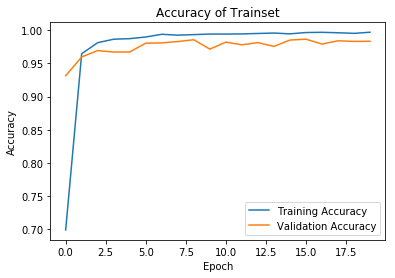

In [15]:
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

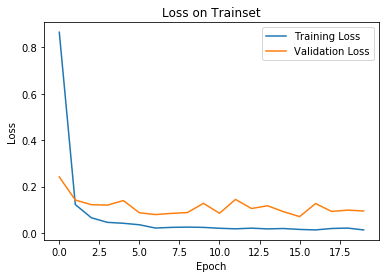

In [16]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Loss on Trainset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

## The model below gave me the best results in terms of accuracy without overfitting. I used this model to predict the classifications on the testset.

In [20]:
#Includes Batchnormalization.
def inception2_w_bat(x, n = 32):
    tower_1 = Conv2D(n, 1, padding = 'same')(x)
    tower_2 = Conv2D(n, 1, padding = 'same')(x)
    tower_3 = Conv2D(n, 1, padding = 'same')(x)
    tower_4 = MaxPooling2D(pool_size = (3,3), strides = (1,1), padding = 'same')(x)
    tower_1 = BatchNormalization()(tower_1)
    tower_2 = BatchNormalization()(tower_2)
    tower_3 = BatchNormalization()(tower_3)
    tower_1 = Activation('relu')(tower_1)
    tower_2 = Activation('relu')(tower_2)
    tower_3 = Activation('relu')(tower_3)
    tower_2 = Conv2D(n, 3, padding = 'same')(tower_2)
    tower_3 = Conv2D(n, 5, padding = 'same')(tower_3)
    tower_4 = Conv2D(n, 1, padding = 'same')(tower_4)
    tower_2 = BatchNormalization()(tower_2)
    tower_3 = BatchNormalization()(tower_3)
    tower_4 = BatchNormalization()(tower_4)
    tower_2 = Activation('relu')(tower_2)
    tower_3 = Activation('relu')(tower_3)
    tower_4 = Activation('relu')(tower_4)
    c = Concatenate(axis = -1)([tower_1, tower_2, tower_3, tower_4])
    return c

In [21]:
#This model has a batch normalization.
def model2_w_bat(x):
    a = inception2_w_bat(x)
    b = MaxPooling2D(pool_size = (2,2))(a)
    c = inception2_w_bat(b)
    d = MaxPooling2D(pool_size = (2,2))(c)
    output = Flatten()(d)
    output = Dense(128, activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = Dense(10, activation = 'softmax')(output)
    adam = Adam(lr = 0.001)
    model = Model(inputs = x, outputs = output)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

input_img = Input(shape=(40, 30, 1))
model_best = model2_w_bat(input_img)

print(model.summary())

t0 = time.time()
log = model_best.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 5, verbose = 2)
t1 = time.time()
print(t1-t0, " seconds")

scores = model_best.evaluate(X_val, y_val, verbose = 0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 30, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 40, 30, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 40, 30, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 40, 30, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (

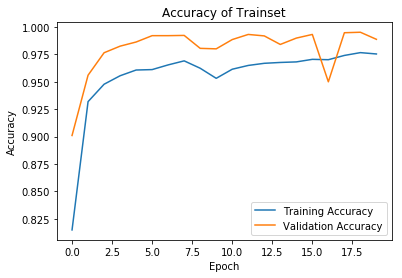

In [22]:
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

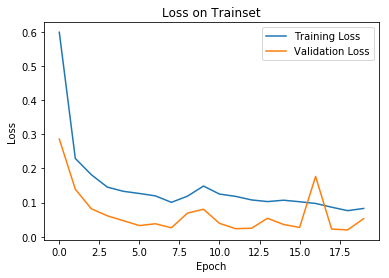

In [23]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Loss on Trainset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

## From this cell on, I am trying run my model on the testset. Once I have generated predictions I will sumbit them to kaggle to determine my score.

In [27]:
import os 
X_test = []
file_name = []
test_img_path = os.path.join('C:/Users/buckf/Documents/MSDS 686/Code/Distracted Driver Project/Data/imgs', 'test', '*.jpg')
test_img_list = glob.glob(test_img_path)
for file in test_img_list:
    file_name.append(file)
    img = Image.open(file).convert('L')
    height, width = img.size
    img.thumbnail((height/16, width/16), Image.ANTIALIAS)
    pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 1)
    X_test.append(pix)

In [28]:
X_test = np.array(X_test, dtype = 'float32')
X_test = X_test / 255

In [29]:
X_test.shape

(79726, 40, 30, 1)

In [44]:
#This method predicts probablities of the class labels for the test images.
y_proba = model_best.predict(X_test)

In [47]:
#This is an example prediction.
y_proba[17]

array([1.88708659e-02, 8.22132919e-03, 4.84458833e-05, 1.66264713e-01,
       1.96994049e-04, 7.93838024e-01, 5.10912760e-05, 1.37051165e-05,
       2.95166887e-04, 1.21996030e-02], dtype=float32)

In [36]:
file_name[123]

'C:/Users/buckf/Documents/MSDS 686/Code/Distracted Driver Project/Data/imgs\\test\\img_100133.jpg'

In [37]:
#This for loop extracts the ###_img.jpg name.
import re
name_list = []
for name in file_name:
    i = re.findall(r'img_\d*.jpg', name)
    name_list.append(i)

In [38]:
#The images weren't imported in any special order.
#Consideration needs to be run so that the right classification is for 
#the right image.
name_arr = np.array(name_list, dtype = str)

In [39]:
#This combines the image name with the photo pixel data.
comb_arr = np.concatenate((name_arr, y_proba), axis = 1)

In [56]:
col = ['img', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9' ]

In [57]:
import pandas as pd

In [69]:
sub_df = pd.DataFrame(data = comb_arr, columns=col)

In [71]:
sub_df.head(10)

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,2.0438597e-06,9.934503e-06,5.9435115e-06,3.904241e-06,5.515522e-06,0.9992853,3.9265277e-07,9.423262e-08,1.2718043e-08,0.0006868635
1,img_10.jpg,0.45002827,0.0025308898,1.1680721e-05,0.16478086,0.0001981353,0.37396947,1.94036e-05,6.5918207e-06,4.2448298e-07,0.0084543405
2,img_100.jpg,0.94584686,0.015857758,1.4315084e-05,0.00036729185,0.00022708949,8.203071e-05,0.0036602553,0.00066024036,0.00046421096,0.032819893
3,img_1000.jpg,0.0052840337,0.0038581877,0.84841454,0.00010542589,0.0068388823,0.00012806791,0.024246158,0.010020705,0.100268975,0.00083504955
4,img_100000.jpg,9.892503e-07,1.0097832e-05,3.1131153e-10,1.810496e-05,0.0001584833,0.9932019,4.6608886e-07,9.937115e-07,1.5045466e-09,0.006609078
5,img_100001.jpg,0.027148563,0.009849146,6.4907476e-06,0.0027533574,0.010897245,0.08656622,4.1349836e-06,6.442033e-05,4.7662023e-05,0.8626628
6,img_100002.jpg,0.009342503,0.0039262893,0.0001567801,3.3457472e-05,0.9728333,0.0016804618,0.0002199358,0.00029329205,0.00956131,0.0019528718
7,img_100003.jpg,0.0012389047,0.032126214,4.4098255e-07,5.168526e-05,0.015199028,0.07704299,5.8812366e-06,2.4961724e-07,0.0009741371,0.87336046
8,img_100004.jpg,0.001145372,0.023466986,0.034411527,0.002289662,0.004667882,0.12721258,0.7783934,5.8744103e-05,0.0040463624,0.024307447
9,img_100005.jpg,0.00039613218,0.0020137492,3.1907082e-06,1.7332645e-06,0.004275528,0.0048285136,0.0008634443,0.9865378,4.6879084e-08,0.0010798073


In [72]:
#This was the file to be submitted to Kaggle to be scored.
sub_df.to_csv('submission.csv', index = False)